In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as td
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import cv2


In [8]:
dir=r'C:\Users\Harsimran Singh\Downloads\archive(2)\Dataset'

In [9]:
train_para=ImageDataGenerator(rescale=1./255,rotation_range=40,
                       width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.20)

In [10]:
train_generator=train_para.flow_from_directory(dir,
                                  target_size=(300,300),
                                  batch_size=50,
                                  class_mode='categorical',
                                  subset='training')


Found 12293 images belonging to 2 classes.


In [11]:
val_data=r'C:\Users\Harsimran Singh\Downloads\archive(2)\Dataset\val'

Text(0, 0.5, 'Number of Traingn images')

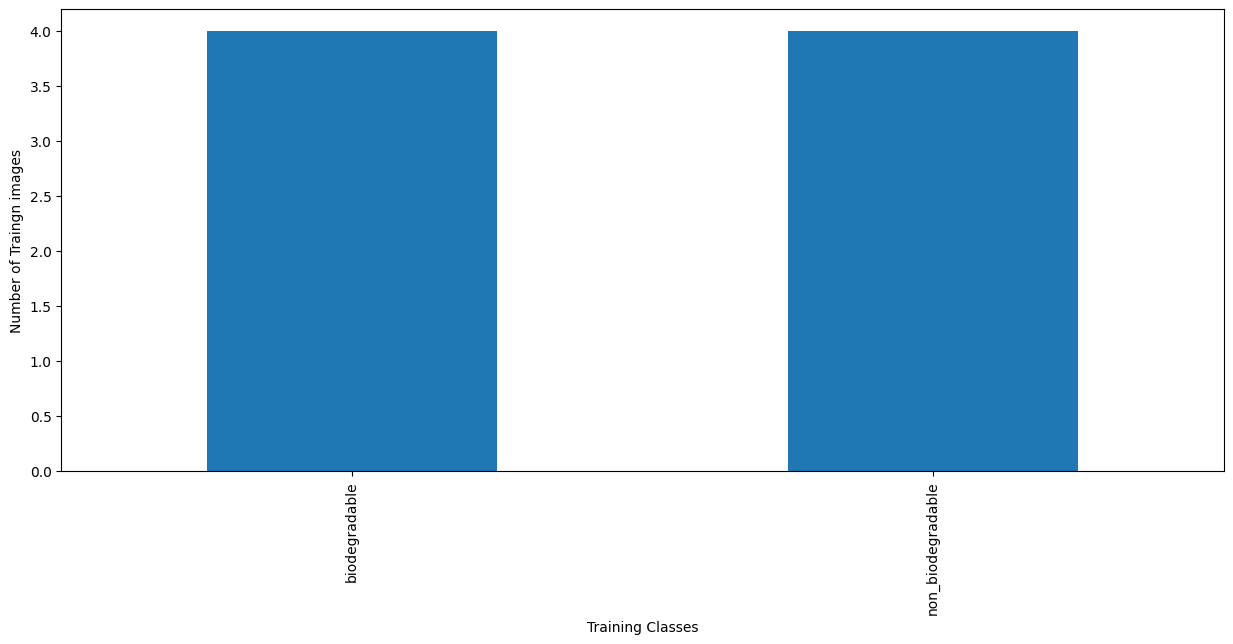

In [12]:
import os
train_path = r'C:\Users\Harsimran Singh\Downloads\archive(2)\Dataset\train'
classes = os.listdir(train_path)
data_dic = {}
for folder in os.listdir(train_path):
    data_dic[folder] = len(os.listdir(train_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [13]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [14]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5,verbose=2,restore_best_weights=True)

In [15]:
model.compile(

    optimizer=Adam(learning_rate=0.001),

    loss='categorical_crossentropy',

    metrics=['Accuracy']

)

In [ ]:
history=model.fit(train_generator,
                 epochs=100,
                  batch_size=64,
                 validation_data=val_data,
                  callbacks=[early_stopping])

In [ ]:
model.save(r'D:\ml\waste_classification\waste-classification.h5')

In [13]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


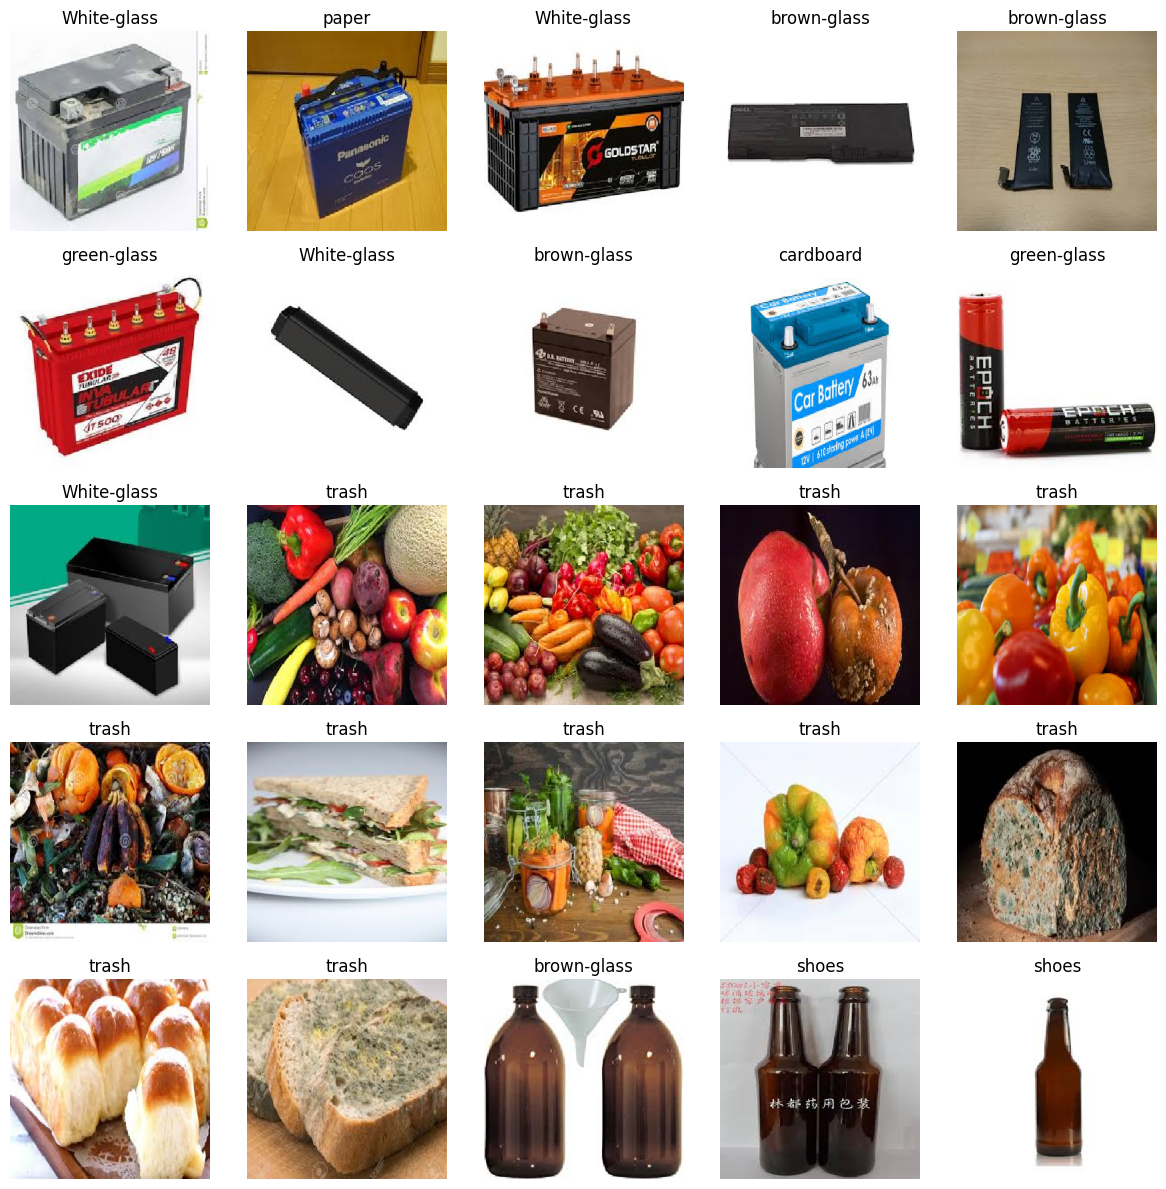

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt


model = tf.keras.models.load_model(r'D:\ml\waste_classification\waste-classification.h5')


class_labels = ['White-glass', 'trash', 'shoes', 'plastic','paper','metal','green-glass','clothes','cardboard','brown-glass','biological','battery']

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(300, 300))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array
test_images_dir = r'C:\Users\Harsimran Singh\Downloads\archive\test'
test_images = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')): 
            test_images.append(os.path.join(root, file))

plt.figure(figsize=(12, 12))
for i, image_path in enumerate(test_images[:25]):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    img = load_img(image_path, target_size=(300, 300))

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(predicted_class)
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 49ms/step


In [20]:
model.load_weights(r'D:\ml\waste_classification\waste-classification.h5')

cap = cv2.VideoCapture(0)

class_names = ['plastic','paper','metal','green-glass','clothes','cardboard','brown-glass','biological','battery']

while True:

    ret, frame = cap.read()

    if not ret:

        break

    img = cv2.resize(frame, (300,300))

    img = img / 255.0

    img = np.array([img])

    prediction = model.predict(img)

    class_id = np.argmax(prediction)

    class_id = np.clip(class_id, 0, len(class_names) - 1)

    class_name = class_names[class_id]

    cv2.putText(frame, class_name, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Waste Classification', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):

        break

cap.release()

cv2.destroyAllWindows()

1/1 [==============================] - 0s 54ms/step


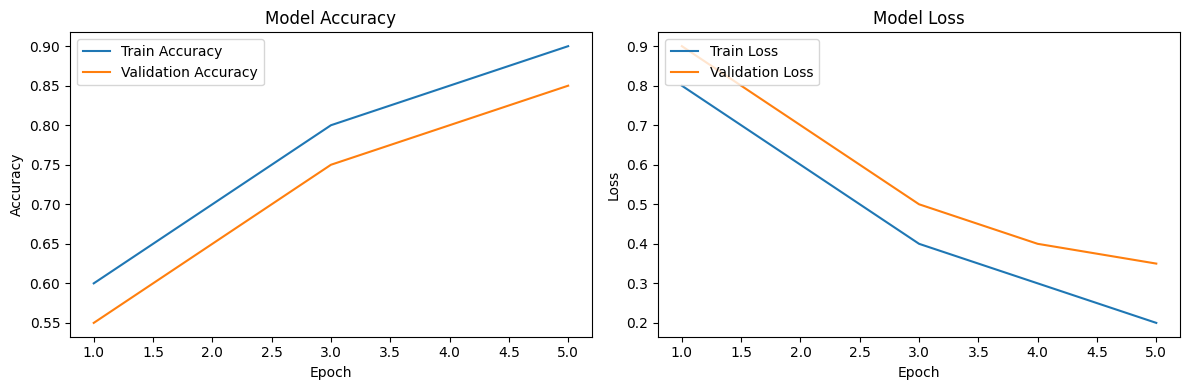

In [18]:
model_path = r'D:\ml\waste_classification\waste-classification.h5'
loaded_model =model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = {
    'accuracy': [0.6, 0.7, 0.8, 0.85, 0.9],
    'val_accuracy': [0.55, 0.65, 0.75, 0.8, 0.85],
    'loss': [0.8, 0.6, 0.4, 0.3, 0.2],
    'val_loss': [0.9, 0.7, 0.5, 0.4, 0.35]
}
epochs = range(1, len(history['accuracy']) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Found 15515 images belonging to 12 classes.
485/485 [==============================] - 160s 331ms/step


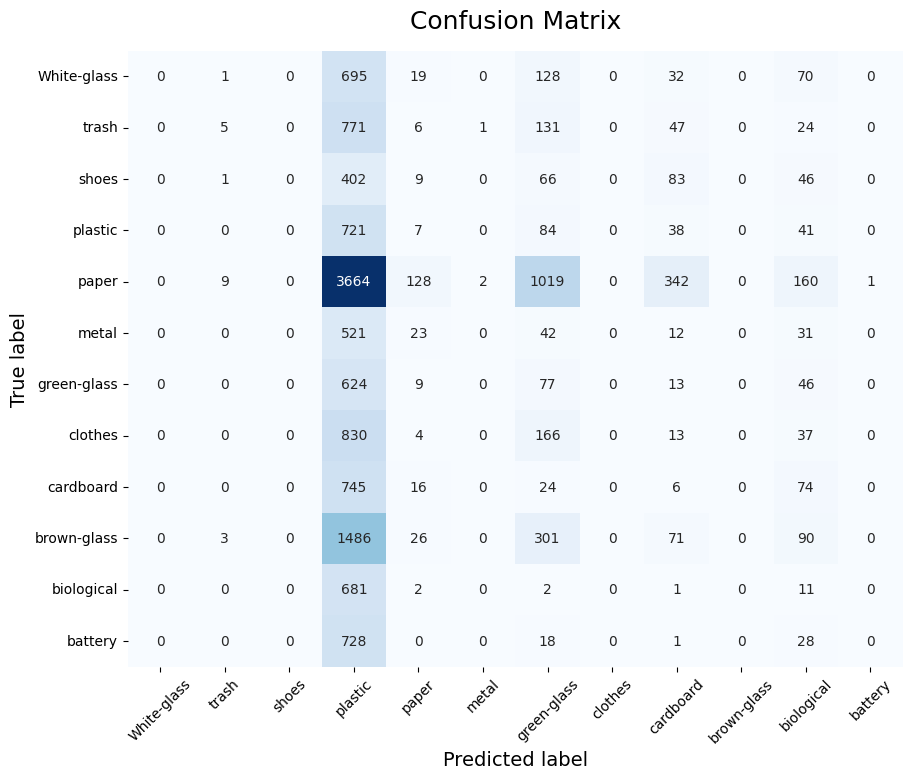

Classification Report
              precision    recall  f1-score   support

 White-glass       0.00      0.00      0.00       945
       trash       0.26      0.01      0.01       985
       shoes       0.00      0.00      0.00       607
     plastic       0.06      0.81      0.11       891
       paper       0.51      0.02      0.05      5325
       metal       0.00      0.00      0.00       629
 green-glass       0.04      0.10      0.05       769
     clothes       0.00      0.00      0.00      1050
   cardboard       0.01      0.01      0.01       865
 brown-glass       0.00      0.00      0.00      1977
  biological       0.02      0.02      0.02       697
     battery       0.00      0.00      0.00       775

    accuracy                           0.06     15515
   macro avg       0.08      0.08      0.02     15515
weighted avg       0.20      0.06      0.03     15515



In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    r'C:\Users\Harsimran Singh\Downloads\archive\garbage_classification',
    target_size=(300, 300), 
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)

Y_test = model.predict(test_generator)

y_test = np.argmax(Y_test, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_test)

class_names = ['White-glass', 'trash', 'shoes', 'plastic', 'paper', 'metal', 'green-glass', 'clothes', 'cardboard', 'brown-glass', 'biological', 'battery']
matrix = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
heatmap.set_title('Confusion Matrix', fontdict={'fontsize':18}, pad=16)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

print('Classification Report')
print(classification_report(y_true, y_test, target_names=class_names, zero_division=0))

Text(0, 0.5, 'Number of Traingn images')

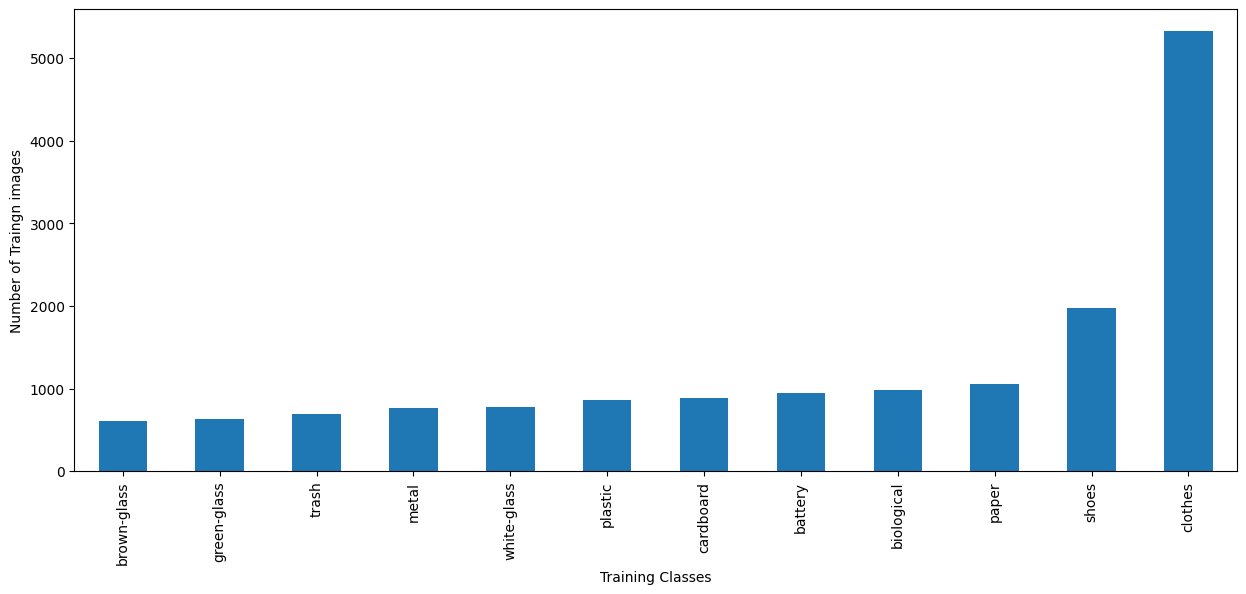

In [29]:
import cv2
import numpy as np
model.load_weights(r'D:\ml\waste_classification\waste-classification.h5')

cap = cv2.VideoCapture(0)

class_names = ['plastic', 'paper', 'metal', 'green-glass', 'clothes', 
               'cardboard', 'brown-glass', 'biological', 'battery']
while True:
    ret, frame = cap.read()
    if not ret:
        break
    img = cv2.resize(frame, (300, 300))
    img = img / 255.0
    img = np.array([img])
    prediction = model.predict(img)
    class_id = np.argmax(prediction)
    if class_id < len(class_names):
        class_name = class_names[class_id]
    else:
        class_name = "Unknown"
    cv2.putText(frame, class_name, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imshow('Waste Classification', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

